<a href="https://colab.research.google.com/github/siveshb1/Machine-Learning-Projects/blob/main/Linear_Regression_(Advertising).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
Use relevant machine learning model to predict total sales using features like money spent on Advertising/Marketing

## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

## Load dataset

In [1]:
!wget https://raw.githubusercontent.com/siveshb1/Machine-Learning-Projects/main/Data_Sets/Advertising.csv

--2024-04-08 02:10:14--  https://raw.githubusercontent.com/siveshb1/Machine-Learning-Projects/main/Data_Sets/Advertising.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5166 (5.0K) [text/plain]
Saving to: ‘Advertising.csv’

Advertising.csv     100%[===================>]   5.04K  --.-KB/s    in 0s      

2024-04-08 02:10:14 (35.5 MB/s) - ‘Advertising.csv’ saved [5166/5166]



In [4]:
data = pd.read_csv('/content/Advertising.csv')

In [5]:
data.drop('Unnamed: 0',axis=1 , inplace=True)

## Domain Analysis

In [6]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


* Sales is the target
*TV, Radio and Newspapaer are the variables


## Basic Checks

In [ ]:
data.shape

(200, 4)

In [ ]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [ ]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Insights
* Average sales made by the company is $14.02M
* Average amount spend on TV is more compared to Radio and Newspaper.
* Maximum amount spent on TV advertising is more compared to Radio and Newspaper.

In [ ]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Exploratory Data Analysis

Univariate Analysis

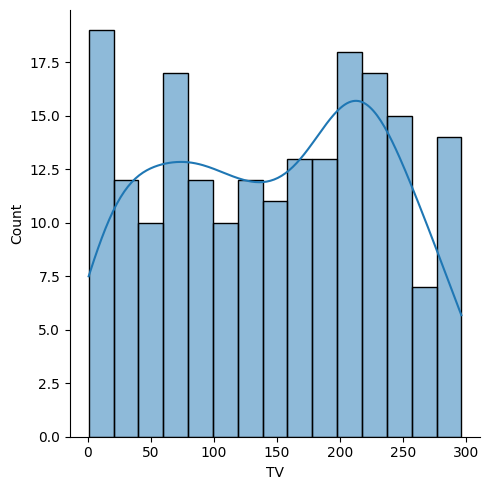

In [ ]:
sns.displot(x=data['TV'], kde=True, bins =15)

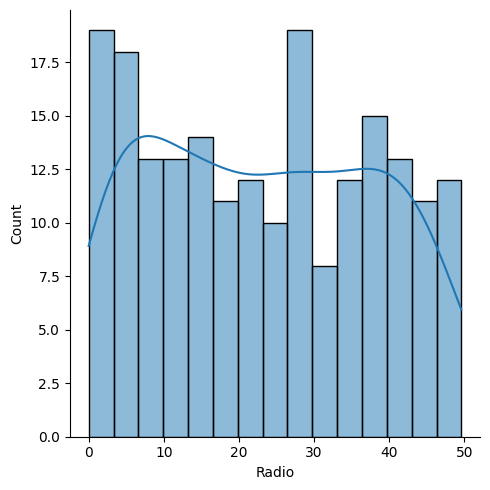

In [ ]:
sns.displot(x=data['Radio'], kde=True, bins =15)

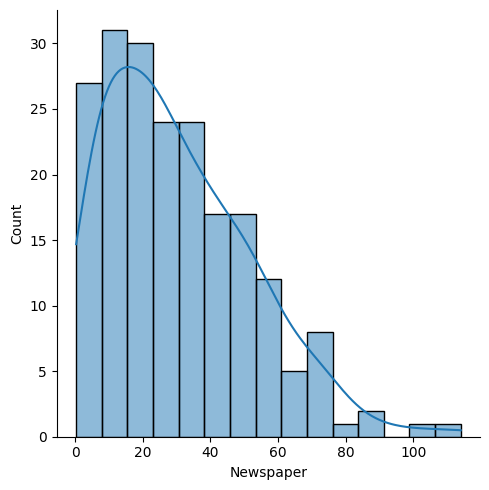

In [ ]:
sns.displot(x=data['Newspaper'], kde=True, bins =15)

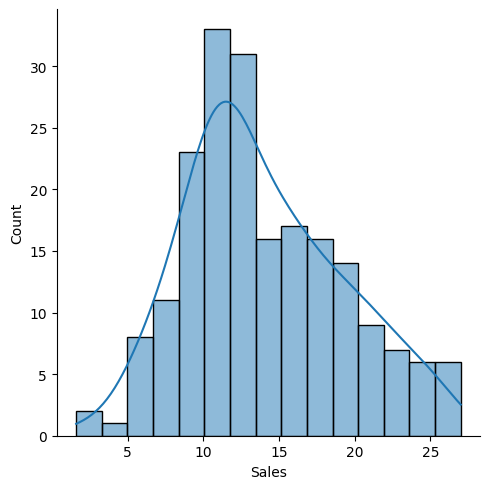

In [ ]:
sns.displot(x=data['Sales'], kde=True, bins =15);

* Only Sales representing normal distribution.
* Other are skewed/not normal.

Bivariate Analysis

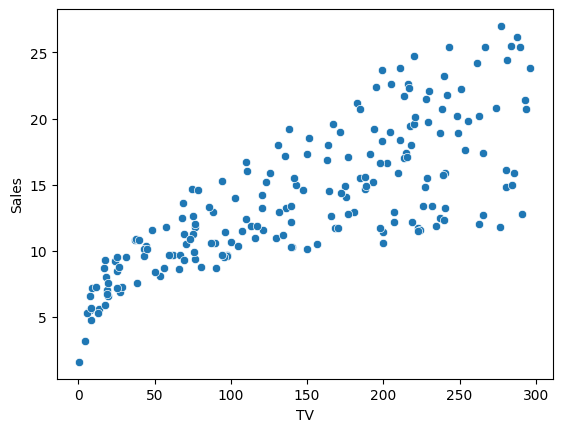

In [ ]:
sns.scatterplot(data=data, x='TV', y = 'Sales');

#Insights
# Higher the TV AD, higher the sales

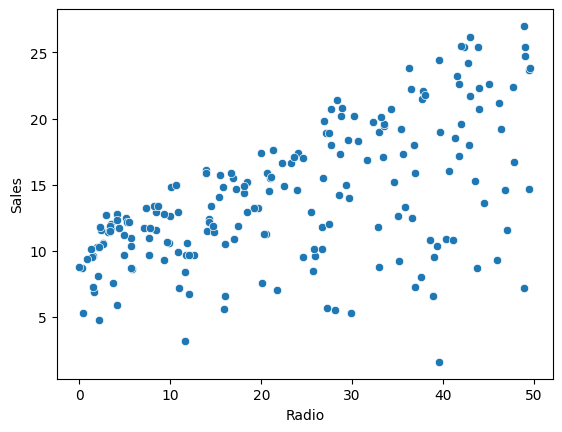

In [ ]:
sns.scatterplot(data=data, x='Radio', y = 'Sales');

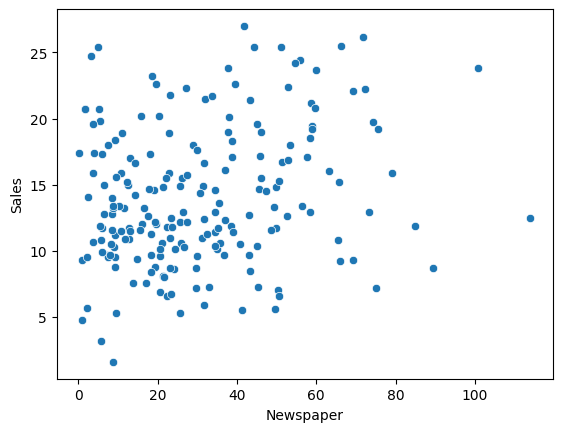

In [ ]:
sns.scatterplot(data=data, x='Newspaper', y = 'Sales');

Multivariate Analysis

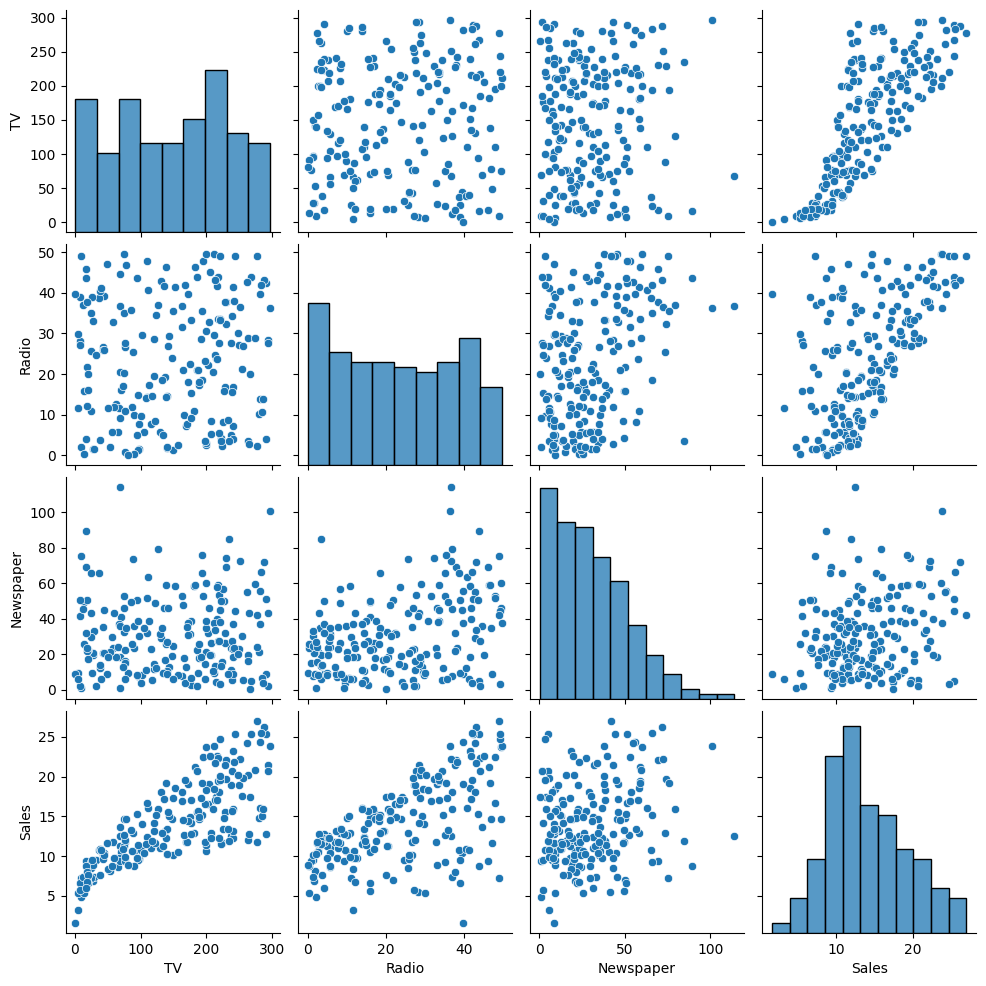

In [ ]:
sns.pairplot(data)

In [ ]:
data.duplicated().sum()

0

# Check Outliers

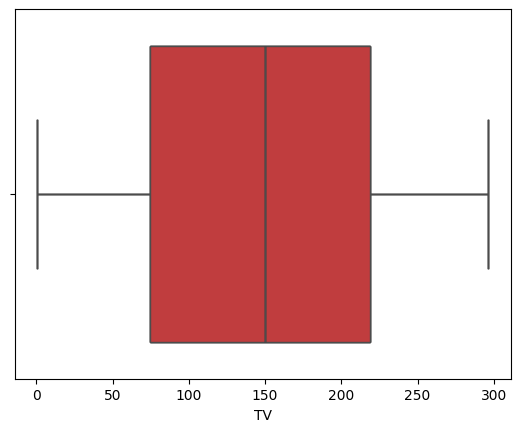

In [ ]:
for columns in data:
  sns.boxplot(x=data['TV'])

<Axes: xlabel='Radio'>

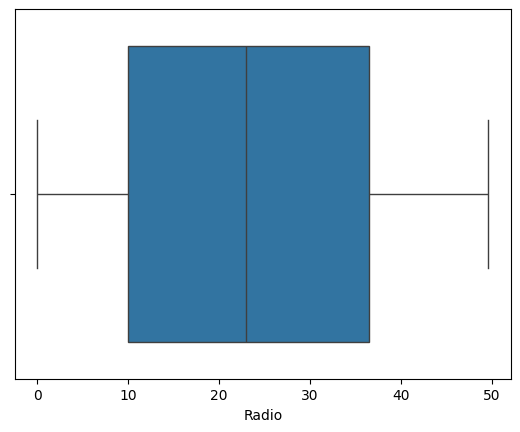

In [ ]:
sns.boxplot(x=data['Radio'])

<Axes: xlabel='Newspaper'>

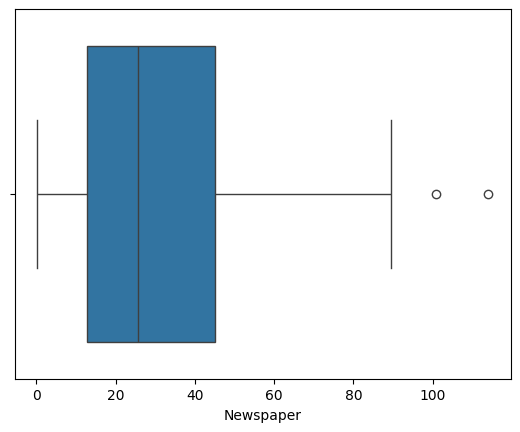

In [ ]:
sns.boxplot(x=data['Newspaper'])

<Axes: xlabel='Sales'>

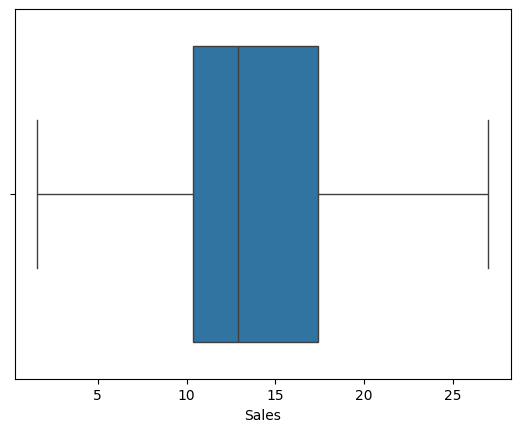

In [ ]:
sns.boxplot(x=data['Sales'])

# Finding Outliers
* IOR - if data is not normal
* 3-sigma rule - if data is normal

## IQR
* find Q1 and Q3
* IQR = Q3 - Q1
* lower limit = Q1 - 1.5 * IQR
* upper limit = Q3 + 1.5 * IQR

In [ ]:
Q1 = data['Newspaper'].quantile(0.25)
Q3 = data['Newspaper'].quantile(0.75)
IQR = Q3 - Q1
IQR

32.35

In [ ]:
Lower_limit = Q1 - 1.5*IQR
Upper_limit = Q3 + 1.5*IQR

In [ ]:
Lower_limit

-35.775000000000006

In [ ]:
Upper_limit

93.625

In [ ]:
data['Newspaper'][(data['Newspaper'] > Upper_limit) | (data['Newspaper'] < Lower_limit)] = data['Newspaper'].median()

In [ ]:
data['Newspaper']

0      69.2
1      45.1
2      69.3
3      58.5
4      58.4
       ... 
195    13.8
196     8.1
197     6.4
198    66.2
199     8.7
Name: Newspaper, Length: 200, dtype: float64

<Axes: >

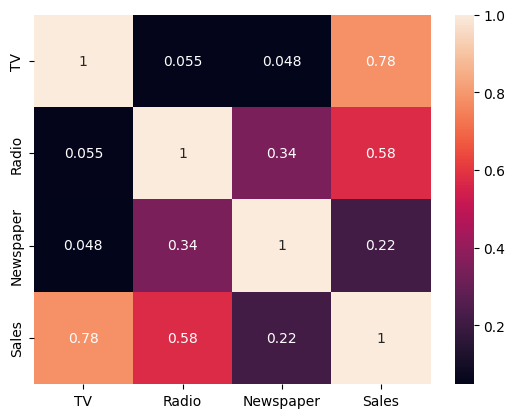

In [ ]:
sns.heatmap(data.corr(),annot=True)

<Axes: >

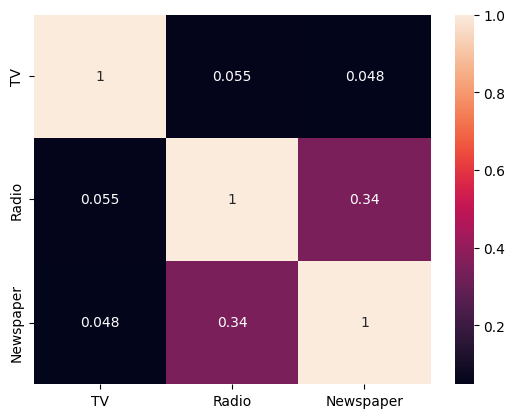

In [ ]:
sns.heatmap(data.drop('Sales',axis=1).corr(),annot=True)

In [ ]:
X = data.drop('Sales', axis=1)
y = data['Sales']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.score(X_test,y_test)

0.8932046345002821

In [ ]:
y_preds = model.predict(X_test)
y_preds

array([21.74261818, 16.45847872,  7.66286499, 17.89618848, 18.68045993,
       23.85771181, 16.33080237, 13.44349493,  9.17017809, 17.35227496,
       14.46164988,  9.8601593 , 17.27402567, 16.71703562, 15.08344273,
       15.57373897, 12.44941398, 17.28721462, 11.10530161, 18.08164104,
        9.34118557, 12.6898302 ,  8.77773907, 10.47200252, 11.39821563,
       15.03350496,  9.78227793, 19.46779402, 18.24699534, 17.20030396,
       21.6161031 , 14.69460391, 16.30634338, 12.35960733, 19.99771997,
       15.38019555, 13.97103888, 10.06338373, 20.98162526,  7.46117374])

In [ ]:
model.coef_

array([0.04686734, 0.17882156, 0.00218229])

In [ ]:
model.intercept_

2.911161617850876

In [ ]:
model.predict([[100,50,10]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([16.56079631])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
MSE = mean_squared_error(y_test, y_preds)